# **Collecting Job Data Using APIs**


## Objectives


*   Collect job data from GitHub Jobs API
*   Store the collected data into an excel spreadsheet.


#### Instructions


Run all the cells of the Jobs_API file. (Even if you receive an asterik sign after running the last cell, the code works fine.)

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.


The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Collect Jobs Data using GitHub Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [28]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [36]:
#Import required libraries
import requests 
import json
import pandas as pd
from matplotlib import pyplot as plt

#### The function to get the number of jobs for the Python technology.
 ##### The keys in the json are 
 * Job Title
 * Job Experience Required
 * Key Skills
 * Role Category
 * Location
 * Functional Area
 * Industry
 * Role 

In [6]:
api_url = "http://127.0.0.1:5000/data"

def get_number_of_jobs_T(technology):

    payload = {"Key Skills": technology}
    response = requests.get(api_url, params=payload)

    if response.ok:

        data = response.json()

        number_of_jobs = len(data)
        return number_of_jobs
    return 'not found'



Calling the function for Python and checking if it works.


In [7]:
get_number_of_jobs_T("Python")

1173

#### The function to find number of jobs in US for a location of your choice


In [10]:
def get_number_of_jobs_L(location):

    payload = {"Location": location}
    response = requests.get(api_url, params=payload)

    if response.ok:

        data = response.json()
        number_of_jobs = len(data)

        return number_of_jobs

Call the function for Los Angeles and check if it is working.


In [11]:
get_number_of_jobs_L('Los Angeles')

640

### Store the results in an excel file


The list of all locations for which you need to find the number of jobs postings.


In [16]:
locations_list = ['Los Angeles', 'New York', 'San Francisco', 
                  'Washington DC', 'Seattle', 'Austin', 'Detroit']

In [70]:
dataframe = pd.DataFrame(columns=['Location', 'Positions_number'])

Find the number of jobs postings for each of the location in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [71]:
for location in locations_list:

    positions_number = get_number_of_jobs_L(location)

    new_row = {'Location': location, 'Positions_number': positions_number}
    dataframe = dataframe._append(new_row, ignore_index=True)

dataframe = dataframe.sort_values(by=['Positions_number'], ascending=False)
dataframe

,Location,Positions_number
3,Washington DC,5316
6,Detroit,3945
4,Seattle,3375
1,New York,3226
0,Los Angeles,640
2,San Francisco,435
5,Austin,434


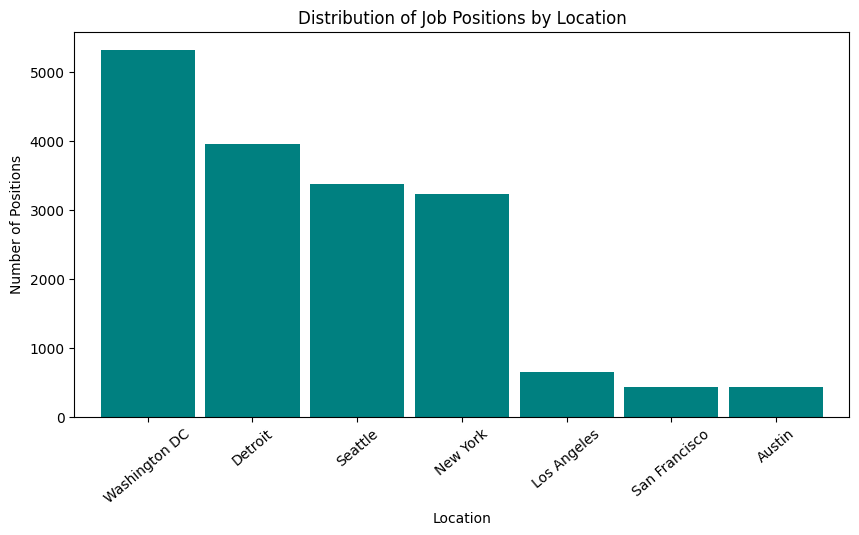

In [85]:
dataframe.plot.bar(x='Location', y='Positions_number', legend=False, width=.9, color='teal', figsize=(10,5))
plt.title('Distribution of Job Positions by Location')
plt.ylabel('Number of Positions')
plt.xticks(rotation=40)
plt.show()

Save into an excel spreadsheet named 'github-job-postings.xlsx'.


In [73]:
dataframe.to_excel('github-job-postings.xlsx', sheet_name='location', engine='xlsxwriter')

#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [75]:
technology_list = ['C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 'Scala', 
                   'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB']

dataframe_t = pd.DataFrame(columns=['Technology', 'Positions_number'])

for technology in technology_list:

    positions_number = get_number_of_jobs_T(technology)

    new_row = {'Technology': technology, 'Positions_number': positions_number}
    dataframe_t = dataframe_t._append(new_row, ignore_index=True)

dataframe_t.to_excel('github-job-postings.xlsx', sheet_name='technology', engine='xlsxwriter')
dataframe_t = dataframe_t.sort_values(by=['Positions_number'], ascending=False)
dataframe_t


,Technology,Positions_number
0,C,13498
3,Java,2609
5,Python,1173
7,Oracle,784
4,JavaScript,355
1,C#,333
2,C++,305
8,SQL Server,250
11,MongoDB,174
6,Scala,33


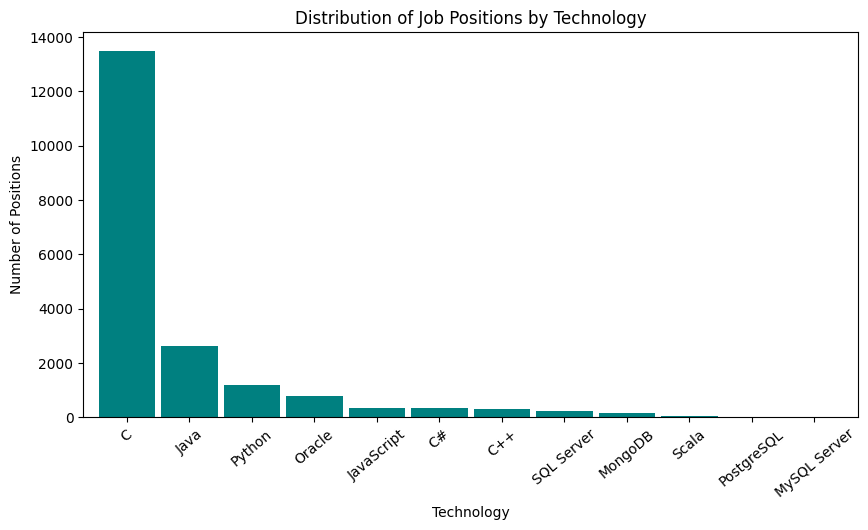

In [86]:
dataframe_t.plot.bar(x='Technology', y='Positions_number', legend=False, width=.9, color='teal', figsize=(10,5))
plt.title('Distribution of Job Positions by Technology')
plt.ylabel('Number of Positions')
plt.xticks(rotation=40)
plt.show()

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
